In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

### Load scalability data

In [16]:
backup = os.getcwd() + '\\backup\\scalability.pkl'
print(backup)

with open(backup, 'rb') as file:
    scalability = pickle.load(file)
scalability

c:\Users\pierp\OneDrive\Desktop\Optimization Models\Python exercises\DSSC_MO\backup\scalability.pkl


[[100, 10, 3, 0, 31.35491770000226, 0.1],
 [100, 10, 3, 1, 34.46138219999921, 0.1],
 [100, 10, 3, 2, 31.391996199999994, 0.1],
 [100, 10, 3, 3, 30.62632189999931, 0.1],
 [100, 10, 3, 4, 28.71415689999776, 0.14],
 [100, 10, 3, 5, 30.069196200001898, 0.1],
 [100, 10, 3, 6, 29.46209700000327, 0.11],
 [100, 10, 3, 7, 29.228656299997965, 0.11],
 [100, 10, 3, 8, 30.55898370000068, 0.1],
 [100, 10, 3, 9, 30.629643399999622, 0.14],
 [100, 20, 6, 0, 97.50710619999882, 0.62],
 [100, 20, 6, 1, 98.00547690000167, 1.3],
 [100, 20, 6, 2, 99.08387130000119, 1.0],
 [100, 20, 6, 3, 98.63293780000095, 0.71],
 [100, 20, 6, 4, 103.03771659999984, 1.36],
 [100, 20, 6, 5, 98.54971789999763, 1.06],
 [100, 20, 6, 6, 96.90654129999893, 0.89],
 [100, 20, 6, 7, 97.60291769999822, 0.54],
 [100, 20, 6, 8, 97.61120279999886, 0.69],
 [100, 20, 6, 9, 96.65466979999837, 0.85],
 [100, 30, 9, 0, 209.82649669999955, 2.36],
 [100, 30, 9, 1, 220.89734690000114, 2.28],
 [100, 30, 9, 2, 208.15367289999995, 3.26],
 [100, 30, 

In [17]:
columns = ['fields', 'storages', 'vehicles', 'iter', 'build_time', 'opt_time']
df_scalability = pd.DataFrame(scalability, columns=columns)

In [18]:
df_scalability

,fields,storages,vehicles,iter,build_time,opt_time
0,100,10,3,0,31.354918,0.10
1,100,10,3,1,34.461382,0.10
2,100,10,3,2,31.391996,0.10
3,100,10,3,3,30.626322,0.10
4,100,10,3,4,28.714157,0.14
5,100,10,3,5,30.069196,0.10
6,100,10,3,6,29.462097,0.11
7,100,10,3,7,29.228656,0.11
8,100,10,3,8,30.558984,0.10
9,100,10,3,9,30.629643,0.14


Some iterations seem blocked or return an optimization runtime which is way far from the other iterations for the same set of [n. fields, n. storages, n. vehichels]; these runs are outiliers and they will not considered for the scalabiltiy analisys.

In [19]:
df_scalability = df_scalability.drop([30, 31, 37]) # remove outliers

###  Group iterations 

group by: 'fields', 'storages' and 'vehicles' and compute mean and standard deviation

In [20]:
df = df_scalability.groupby(['fields', 'storages', 'vehicles'], group_keys=True).agg({'build_time':['mean','std'], 'opt_time':['mean', 'std']})
print(df)

                          build_time            opt_time          
                                mean        std     mean       std
fields storages vehicles                                          
100    10       3          30.649735   1.602065    0.110  0.016330
       20       6          98.359216   1.811175    0.902  0.278480
       30       9         212.423105  13.191471    3.167  1.234351
       40       12        366.481884  20.525518    8.422  3.293899


### Produce Visualization

In [21]:
path = os.getcwd() + '\\images\\'
foot = '100_fields_'

In [22]:
path

'c:\\Users\\pierp\\OneDrive\\Desktop\\Optimization Models\\Python exercises\\DSSC_MO\\images\\'

##### Plot Buid runtime

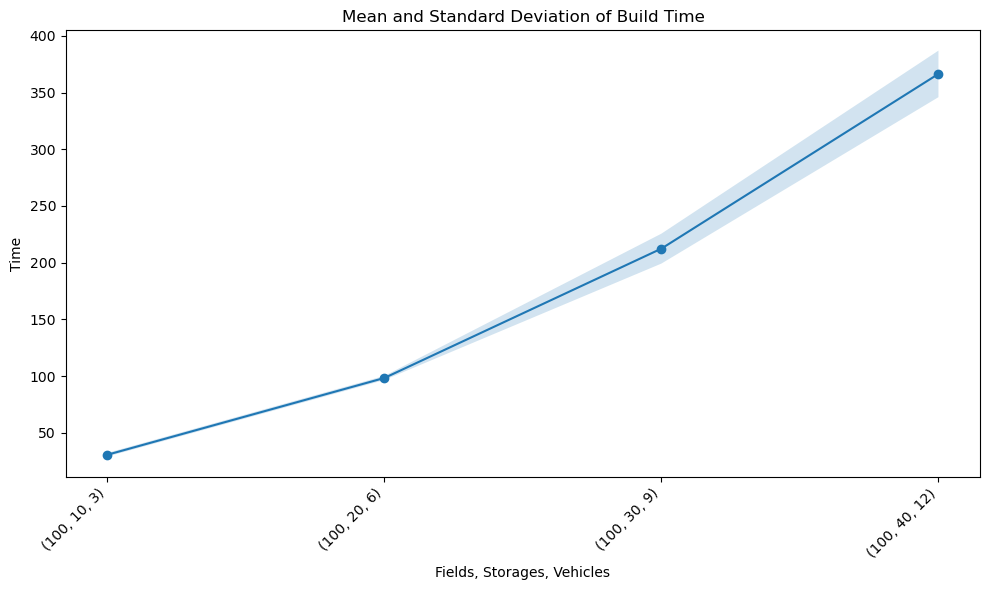

In [23]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot build_time
df['build_time']['mean'].plot(ax=ax, marker='o', label='build_time mean')
ax.fill_between(
    range(len(df)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Build Time')

plt.savefig(path + f'{foot}build_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Optimiaziotion runtime

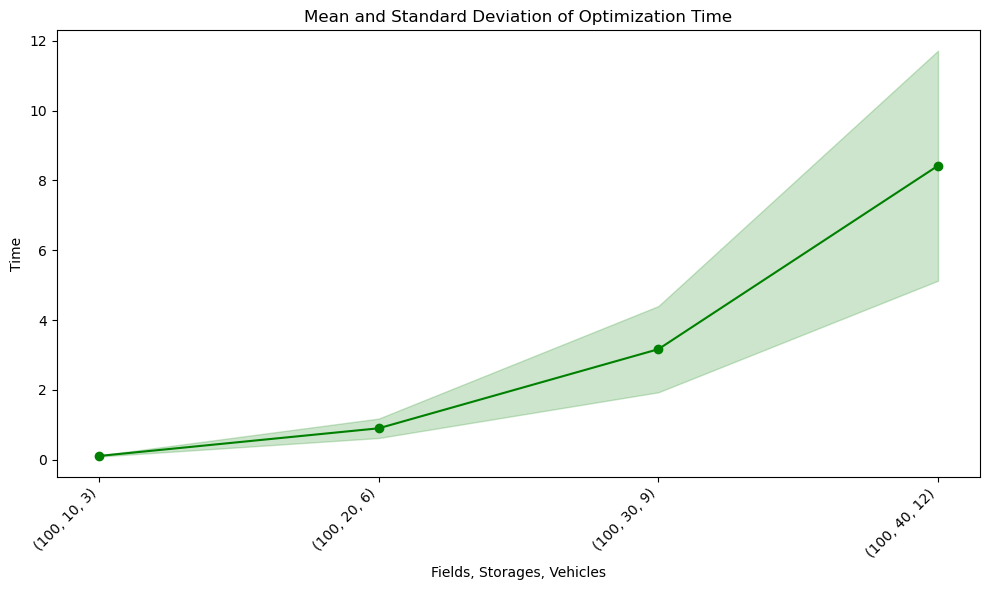

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax, marker='o', color='green')
ax.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

# Customize the plot
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Optimization Time')

plt.savefig(path + f'{foot}opt_time.svg', format='svg')
plt.tight_layout()
plt.show()

##### Plot Total runtime (Build + Optimization)

In [25]:
# Group by the first level of the multi-index and sum
tot_time = {
 'mean_time': df.loc[:,'build_time']['mean'] + df.loc[:,'opt_time']['mean'],
 'std_time': df.loc[:,'build_time']['std'] + df.loc[:,'opt_time']['std']
}

tot_time = pd.DataFrame(tot_time)
print(tot_time) 

                           mean_time   std_time
fields storages vehicles                       
100    10       3          30.759735   1.618395
       20       6          99.261216   2.089655
       30       9         215.590105  14.425822
       40       12        374.903884  23.819416


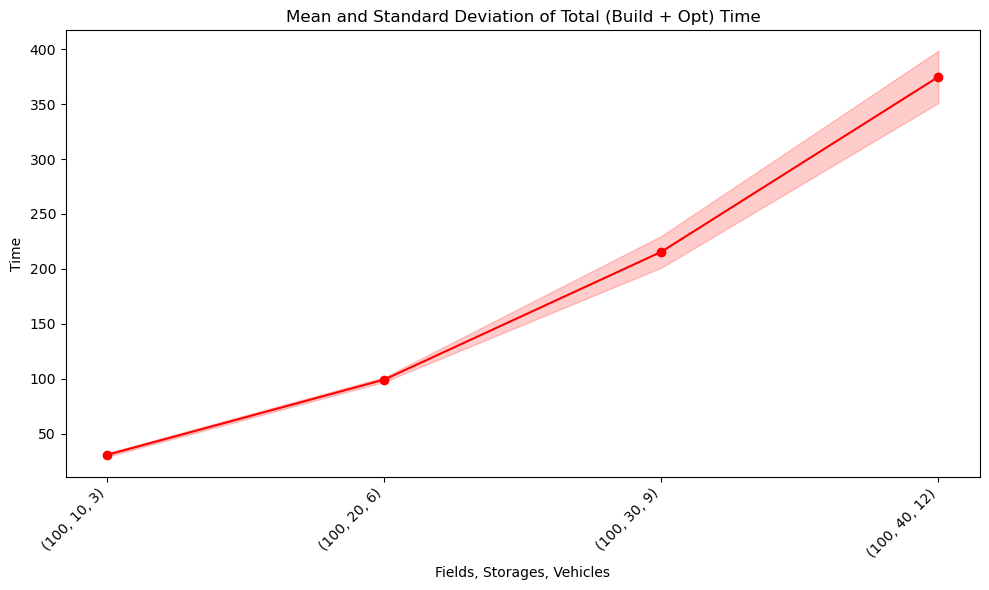

In [26]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot tot_time
tot_time['mean_time'].plot(ax=ax, marker='o', color='red')
ax.fill_between(
    range(len(tot_time)),
    tot_time['mean_time'] - tot_time['std_time'],
    tot_time['mean_time'] + tot_time['std_time'],
    alpha=0.2,
    color='red'
)

# Customize the plot
ax.set_xticks(range(len(tot_time)))
ax.set_xticklabels(tot_time.index.tolist(), rotation=45, ha='right')
ax.set_xlabel('Fields, Storages, Vehicles')
ax.set_ylabel('Time')
ax.set_title('Mean and Standard Deviation of Total (Build + Opt) Time')

plt.tight_layout()
plt.savefig(path + f'{foot}total_time.svg', format='svg')
plt.show()

##### Plot Total runtime (Build + Optimization) & only Optimization runtime

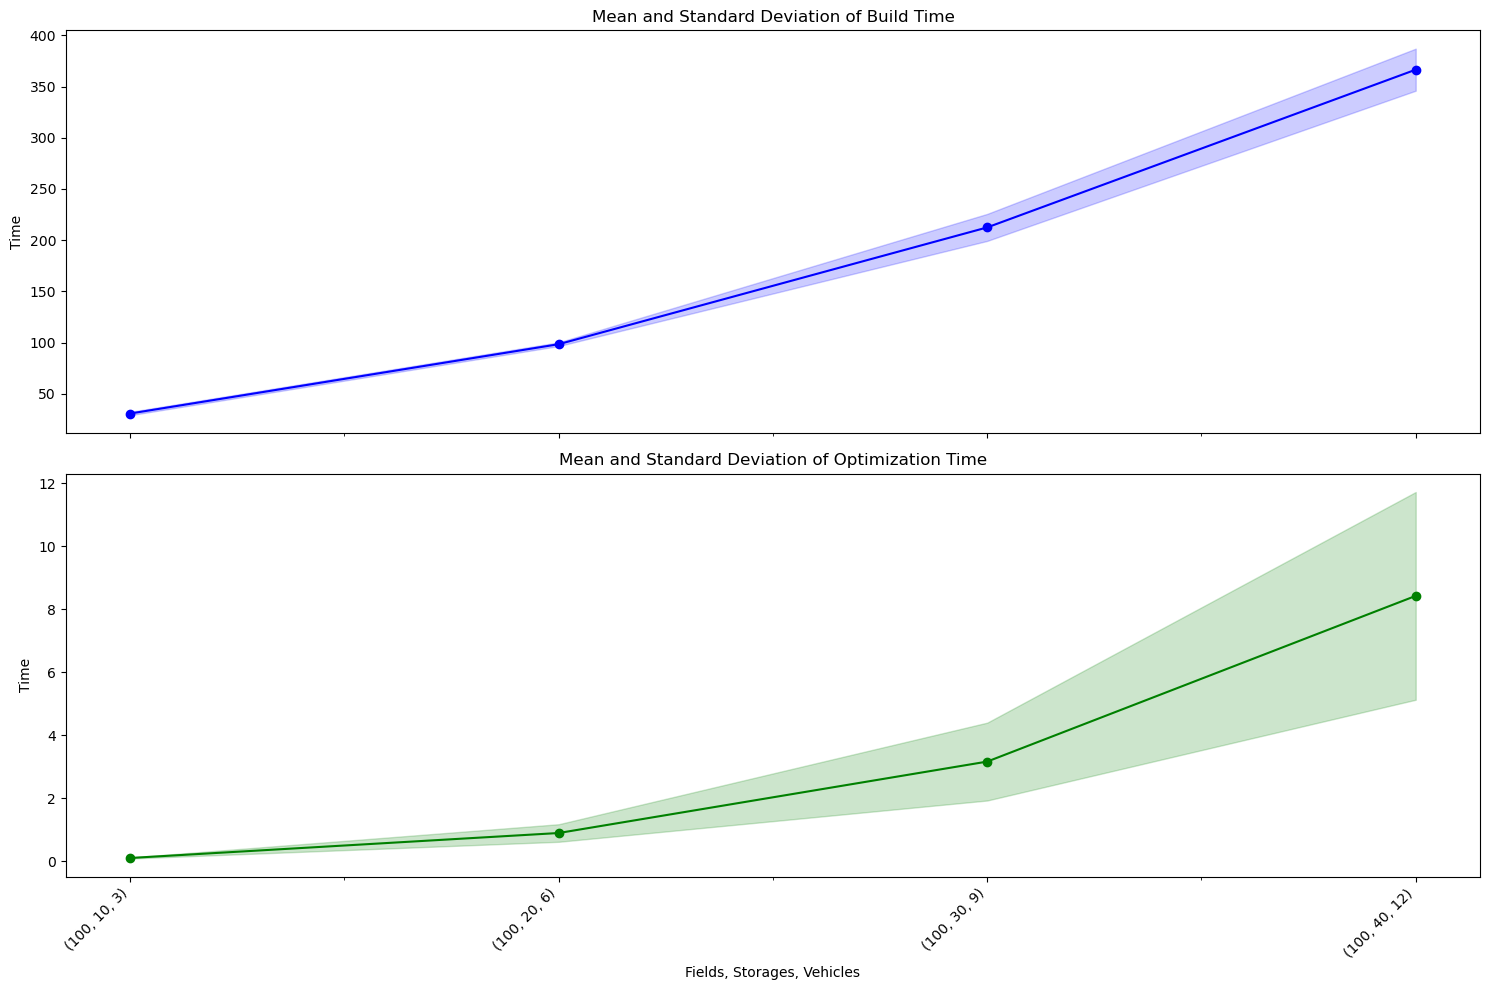

In [34]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot build_time
df['build_time']['mean'].plot(ax=ax1, marker='o', label='build mean time', color='blue')
ax1.fill_between(
    range(len(tot_time)),
    df['build_time']['mean'] - df['build_time']['std'],
    df['build_time']['mean'] + df['build_time']['std'],
    alpha=0.2,
    color='blue'
)

ax1.set_xticks(range(len(df['build_time'])))
ax1.set_xticklabels(df['build_time'].index.tolist(), rotation=45, ha='right')

ax1.set_title('Mean and Standard Deviation of Build Time')
ax1.set_ylabel('Time')
ax1.set_xlabel('Fields, Storages, Vehicles')

# Plot opt_time
df['opt_time']['mean'].plot(ax=ax2, marker='o', label='opt mean time', color='green')
ax2.fill_between(
    range(len(df)),
    df['opt_time']['mean'] - df['opt_time']['std'],
    df['opt_time']['mean'] + df['opt_time']['std'],
    alpha=0.2,
    color='green'
)

ax2.set_xticks(range(len(df['opt_time'])))
ax2.set_xticklabels(df['opt_time'].index.tolist(), rotation=45, ha='right')

ax2.set_title('Mean and Standard Deviation of Optimization Time')
ax2.set_ylabel('Time')
ax2.set_xlabel('Fields, Storages, Vehicles')


plt.savefig(path + f'{foot}total_and_opt_time.svg', format='svg')
plt.tight_layout()
plt.show()